## 台灣銀行牌告匯率爬蟲練習
### 範例1： 練習爬取台幣對其他貨幣匯率資料


In [2]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from fake_useragent import UserAgent

In [16]:
# 進入台灣銀行牌告匯率網頁：https://rate.bot.com.tw/xrt?Lang=zh-TW ，擷取當日台幣對美金的匯率資訊
url = 'https://rate.bot.com.tw/xrt?Lang=zh-TW'
ua = UserAgent()
header ={'user-agent': ua.random}
response = requests.get(url , headers = header)
soup = BeautifulSoup(response.text,'lxml')

money = soup.find('tbody')
for i in money.find_all('tr'):
    money_type = i.find('div',attrs={'class': 'visible-phone print_hide'})
    
    if(money_type.text.strip()=='美金 (USD)'):
        print(money_type.text.strip())
        buy = i.find('td',attrs={'data-table': '本行現金買入'})
        sell = i.find('td',attrs={'data-table': '本行現金賣出'})
        print('本行現金買入: ', buy.text.strip())
        print('本行現金賣出: ', sell.text.strip())

美金 (USD)
本行現金買入:  28.72
本行現金賣出:  29.39


### 範例2：爬取一個月的美金對台幣歷史匯率資料，並畫出趨勢圖

美金 (USD)
https://rate.bot.com.tw/xrt/history/USD
[28.72, 28.87, 28.87, 28.945, 29.05, 29.07, 29.08, 29.09, 29.08, 29.09, 29.095, 29.09, 29.09, 29.085]
[29.39, 29.54, 29.54, 29.615, 29.72, 29.74, 29.75, 29.76, 29.75, 29.76, 29.765, 29.76, 29.76, 29.755]
            buy_rate  sell_rate
date                           
2020/09/01    29.085     29.755
2020/09/02    29.090     29.760
2020/09/03    29.090     29.760
2020/09/04    29.095     29.765
2020/09/07    29.090     29.760
2020/09/08    29.080     29.750
2020/09/09    29.090     29.760
2020/09/10    29.080     29.750
2020/09/11    29.070     29.740
2020/09/14    29.050     29.720
2020/09/15    28.945     29.615
2020/09/16    28.870     29.540
2020/09/17    28.870     29.540
2020/09/18    28.720     29.390


<Figure size 720x576 with 0 Axes>

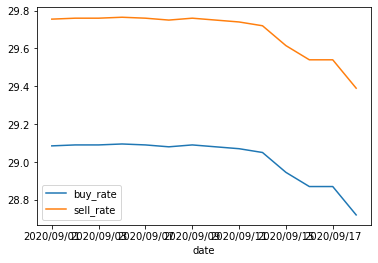

In [50]:
# 先到牌告匯率首頁，爬取所有貨幣的種類
url = 'https://rate.bot.com.tw/xrt?Lang=zh-TW'
ua = UserAgent()
header ={'user-agent': ua.random}
response = requests.get(url , headers = header)
soup = BeautifulSoup(response.text,'lxml')

money = soup.find('tbody')
for i in money.find_all('tr'):
    money_type = i.find('div',attrs={'class': 'visible-phone print_hide'})
    if(money_type.text.strip()=='美金 (USD)'):
        history_link = i.find('td',attrs={'data-table':'歷史匯率'})
        history_URL = 'https://rate.bot.com.tw'+history_link.a['href']
        print(money_type.text.strip())
        print(history_URL)
        
# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
        quote_history_url = history_URL.replace("history", "quote/2020-09")
        res = requests.get(quote_history_url , headers= header)
        soup = BeautifulSoup(res.text,'lxml')
        history_table = soup.find(name='tbody').find_all(name='tr')
        #print(history_table)
        
        date_history = list()
        history_buy = list()
        history_sell = list()
        
        for j in history_table:
            date_string = j.a.text
            date_history.append(date_string)
            
            history_rate = j.find_all('td',attrs={'class':'rate-content-cash text-right print_table-cell'})
            history_buy.append(float(history_rate[0].text))
            history_sell.append(float(history_rate[1].text))
        print(history_buy)
        print(history_sell)
        
        # 將匯率資料建成dataframe形式
        HistoryExchangeRate = pd.DataFrame({'date': date_history ,'buy_rate':history_buy,'sell_rate':history_sell})
        HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
        HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)
        print(HistoryExchangeRate)
        
        # 畫出歷史匯率軌跡圖
        plt.figure(figsize=(10, 8))
        HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 

## 作業part 1：請參考上面的範例，試著爬取所有貨幣對台幣的匯率

In [17]:
url = 'https://rate.bot.com.tw/xrt?Lang=zh-TW'
ua = UserAgent()
header ={'user-agent': ua.random}
response = requests.get(url , headers = header)
soup = BeautifulSoup(response.text,'lxml')

money = soup.find('tbody')
for i in money.find_all('tr'):
    money_type = i.find('div',attrs={'class': 'visible-phone print_hide'})
    print(money_type.text.strip())
    buy = i.find('td',attrs={'data-table': '本行現金買入'})
    sell = i.find('td',attrs={'data-table': '本行現金賣出'})
    print('本行現金買入: ', buy.text.strip())
    print('本行現金賣出: ', sell.text.strip())

美金 (USD)
本行現金買入:  28.72
本行現金賣出:  29.39
港幣 (HKD)
本行現金買入:  3.601
本行現金賣出:  3.805
英鎊 (GBP)
本行現金買入:  36.58
本行現金賣出:  38.7
澳幣 (AUD)
本行現金買入:  20.92
本行現金賣出:  21.7
加拿大幣 (CAD)
本行現金買入:  21.63
本行現金賣出:  22.54
新加坡幣 (SGD)
本行現金買入:  20.89
本行現金賣出:  21.8
瑞士法郎 (CHF)
本行現金買入:  31.24
本行現金賣出:  32.44
日圓 (JPY)
本行現金買入:  0.2693
本行現金賣出:  0.2821
南非幣 (ZAR)
本行現金買入:  -
本行現金賣出:  -
瑞典幣 (SEK)
本行現金買入:  2.93
本行現金賣出:  3.45
紐元 (NZD)
本行現金買入:  19.27
本行現金賣出:  20.12
泰幣 (THB)
本行現金買入:  0.8081
本行現金賣出:  0.9981
菲國比索 (PHP)
本行現金買入:  0.5278
本行現金賣出:  0.6608
印尼幣 (IDR)
本行現金買入:  0.00163
本行現金賣出:  0.00233
歐元 (EUR)
本行現金買入:  33.68
本行現金賣出:  35.02
韓元 (KRW)
本行現金買入:  0.02334
本行現金賣出:  0.02724
越南盾 (VND)
本行現金買入:  0.00088
本行現金賣出:  0.00138
馬來幣 (MYR)
本行現金買入:  5.944
本行現金賣出:  7.569
人民幣 (CNY)
本行現金買入:  4.211
本行現金賣出:  4.373


## 作業part 2：爬取每種貨幣對台幣的一個月歷史匯率資料，並畫出趨勢圖


美金 (USD)
https://rate.bot.com.tw/xrt/history/USD
[28.72, 28.87, 28.87, 28.945, 29.05, 29.07, 29.08, 29.09, 29.08, 29.09, 29.095, 29.09, 29.09, 29.085]
[29.39, 29.54, 29.54, 29.615, 29.72, 29.74, 29.75, 29.76, 29.75, 29.76, 29.765, 29.76, 29.76, 29.755]
            buy_rate  sell_rate
date                           
2020/09/01    29.085     29.755
2020/09/02    29.090     29.760
2020/09/03    29.090     29.760
2020/09/04    29.095     29.765
2020/09/07    29.090     29.760
2020/09/08    29.080     29.750
2020/09/09    29.090     29.760
2020/09/10    29.080     29.750
2020/09/11    29.070     29.740
2020/09/14    29.050     29.720
2020/09/15    28.945     29.615
2020/09/16    28.870     29.540
2020/09/17    28.870     29.540
2020/09/18    28.720     29.390
港幣 (HKD)
https://rate.bot.com.tw/xrt/history/HKD
[3.601, 3.62, 3.62, 3.63, 3.643, 3.646, 3.647, 3.648, 3.647, 3.649, 3.649, 3.649, 3.649, 3.648]
[3.805, 3.824, 3.824, 3.834, 3.847, 3.85, 3.851, 3.852, 3.851, 3.853, 3.853, 3.853, 3.853,

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


[0.8081, 0.8113, 0.813, 0.8123, 0.8131, 0.8132, 0.8131, 0.8125, 0.8119, 0.8122, 0.8134, 0.8122, 0.8165, 0.8246]
[0.9981, 1.0013, 1.003, 1.0023, 1.0031, 1.0032, 1.0031, 1.0025, 1.0019, 1.0022, 1.0034, 1.0022, 1.0065, 1.0146]
            buy_rate  sell_rate
date                           
2020/09/01    0.8246     1.0146
2020/09/02    0.8165     1.0065
2020/09/03    0.8122     1.0022
2020/09/04    0.8134     1.0034
2020/09/07    0.8122     1.0022
2020/09/08    0.8119     1.0019
2020/09/09    0.8125     1.0025
2020/09/10    0.8131     1.0031
2020/09/11    0.8132     1.0032
2020/09/14    0.8131     1.0031
2020/09/15    0.8123     1.0023
2020/09/16    0.8130     1.0030
2020/09/17    0.8113     1.0013
2020/09/18    0.8081     0.9981
菲國比索 (PHP)
https://rate.bot.com.tw/xrt/history/PHP


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


[0.5278, 0.5304, 0.5319, 0.5323, 0.534, 0.5334, 0.5334, 0.533, 0.5334, 0.5325, 0.5337, 0.5337, 0.5344, 0.5347]
[0.6608, 0.6634, 0.6649, 0.6653, 0.667, 0.6664, 0.6664, 0.666, 0.6664, 0.6655, 0.6667, 0.6667, 0.6674, 0.6677]
            buy_rate  sell_rate
date                           
2020/09/01    0.5347     0.6677
2020/09/02    0.5344     0.6674
2020/09/03    0.5337     0.6667
2020/09/04    0.5337     0.6667
2020/09/07    0.5325     0.6655
2020/09/08    0.5334     0.6664
2020/09/09    0.5330     0.6660
2020/09/10    0.5334     0.6664
2020/09/11    0.5334     0.6664
2020/09/14    0.5340     0.6670
2020/09/15    0.5323     0.6653
2020/09/16    0.5319     0.6649
2020/09/17    0.5304     0.6634
2020/09/18    0.5278     0.6608
印尼幣 (IDR)
https://rate.bot.com.tw/xrt/history/IDR


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


[0.00163, 0.00163, 0.00163, 0.00163, 0.00163, 0.00163, 0.00163, 0.00163, 0.00163, 0.00168, 0.00168, 0.00163, 0.00168, 0.00168]
[0.00233, 0.00233, 0.00233, 0.00233, 0.00233, 0.00233, 0.00233, 0.00233, 0.00233, 0.00238, 0.00238, 0.00233, 0.00238, 0.00238]
            buy_rate  sell_rate
date                           
2020/09/01   0.00168    0.00238
2020/09/02   0.00168    0.00238
2020/09/03   0.00163    0.00233
2020/09/04   0.00168    0.00238
2020/09/07   0.00168    0.00238
2020/09/08   0.00163    0.00233
2020/09/09   0.00163    0.00233
2020/09/10   0.00163    0.00233
2020/09/11   0.00163    0.00233
2020/09/14   0.00163    0.00233
2020/09/15   0.00163    0.00233
2020/09/16   0.00163    0.00233
2020/09/17   0.00163    0.00233
2020/09/18   0.00163    0.00233
歐元 (EUR)
https://rate.bot.com.tw/xrt/history/EUR


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


[33.68, 33.71, 33.9, 34.06, 34.12, 34.06, 34.03, 33.94, 34.02, 34.09, 34.11, 34.05, 34.2, 34.52]
[35.02, 35.05, 35.24, 35.4, 35.46, 35.4, 35.37, 35.28, 35.36, 35.43, 35.45, 35.39, 35.54, 35.86]
            buy_rate  sell_rate
date                           
2020/09/01     34.52      35.86
2020/09/02     34.20      35.54
2020/09/03     34.05      35.39
2020/09/04     34.11      35.45
2020/09/07     34.09      35.43
2020/09/08     34.02      35.36
2020/09/09     33.94      35.28
2020/09/10     34.03      35.37
2020/09/11     34.06      35.40
2020/09/14     34.12      35.46
2020/09/15     34.06      35.40
2020/09/16     33.90      35.24
2020/09/17     33.71      35.05
2020/09/18     33.68      35.02
韓元 (KRW)
https://rate.bot.com.tw/xrt/history/KRW


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


[0.02334, 0.02323, 0.02322, 0.02312, 0.02315, 0.0231, 0.02309, 0.02309, 0.0231, 0.02308, 0.02306, 0.02308, 0.02312, 0.02319]
[0.02724, 0.02713, 0.02712, 0.02702, 0.02705, 0.027, 0.02699, 0.02699, 0.027, 0.02698, 0.02696, 0.02698, 0.02702, 0.02709]
            buy_rate  sell_rate
date                           
2020/09/01   0.02319    0.02709
2020/09/02   0.02312    0.02702
2020/09/03   0.02308    0.02698
2020/09/04   0.02306    0.02696
2020/09/07   0.02308    0.02698
2020/09/08   0.02310    0.02700
2020/09/09   0.02309    0.02699
2020/09/10   0.02309    0.02699
2020/09/11   0.02310    0.02700
2020/09/14   0.02315    0.02705
2020/09/15   0.02312    0.02702
2020/09/16   0.02322    0.02712
2020/09/17   0.02323    0.02713
2020/09/18   0.02334    0.02724
越南盾 (VND)
https://rate.bot.com.tw/xrt/history/VND


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


[0.00088, 0.00089, 0.00089, 0.00089, 0.0009, 0.0009, 0.0009, 0.0009, 0.0009, 0.0009, 0.0009, 0.0009, 0.0009, 0.0009]
[0.00138, 0.00139, 0.00139, 0.00139, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014]
            buy_rate  sell_rate
date                           
2020/09/01   0.00090    0.00140
2020/09/02   0.00090    0.00140
2020/09/03   0.00090    0.00140
2020/09/04   0.00090    0.00140
2020/09/07   0.00090    0.00140
2020/09/08   0.00090    0.00140
2020/09/09   0.00090    0.00140
2020/09/10   0.00090    0.00140
2020/09/11   0.00090    0.00140
2020/09/14   0.00090    0.00140
2020/09/15   0.00089    0.00139
2020/09/16   0.00089    0.00139
2020/09/17   0.00089    0.00139
2020/09/18   0.00088    0.00138
馬來幣 (MYR)
https://rate.bot.com.tw/xrt/history/MYR


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


[5.944, 5.958, 5.975, 5.99, 5.989, 5.979, 5.964, 5.956, 5.968, 5.991, 5.997, 6.002, 6.002, 6.006]
[7.569, 7.583, 7.6, 7.615, 7.614, 7.604, 7.589, 7.581, 7.593, 7.616, 7.622, 7.627, 7.627, 7.631]
            buy_rate  sell_rate
date                           
2020/09/01     6.006      7.631
2020/09/02     6.002      7.627
2020/09/03     6.002      7.627
2020/09/04     5.997      7.622
2020/09/07     5.991      7.616
2020/09/08     5.968      7.593
2020/09/09     5.956      7.581
2020/09/10     5.964      7.589
2020/09/11     5.979      7.604
2020/09/14     5.989      7.614
2020/09/15     5.990      7.615
2020/09/16     5.975      7.600
2020/09/17     5.958      7.583
2020/09/18     5.944      7.569
人民幣 (CNY)
https://rate.bot.com.tw/xrt/history/CNY


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


[4.211, 4.228, 4.233, 4.23, 4.215, 4.214, 4.211, 4.209, 4.218, 4.217, 4.213, 4.218, 4.222, 4.225]
[4.373, 4.39, 4.395, 4.392, 4.377, 4.376, 4.373, 4.371, 4.38, 4.379, 4.375, 4.38, 4.384, 4.387]
            buy_rate  sell_rate
date                           
2020/09/01     4.225      4.387
2020/09/02     4.222      4.384
2020/09/03     4.218      4.380
2020/09/04     4.213      4.375
2020/09/07     4.217      4.379
2020/09/08     4.218      4.380
2020/09/09     4.209      4.371
2020/09/10     4.211      4.373
2020/09/11     4.214      4.376
2020/09/14     4.215      4.377
2020/09/15     4.230      4.392
2020/09/16     4.233      4.395
2020/09/17     4.228      4.390
2020/09/18     4.211      4.373


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\User\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<Figure size 720x576 with 0 Axes>

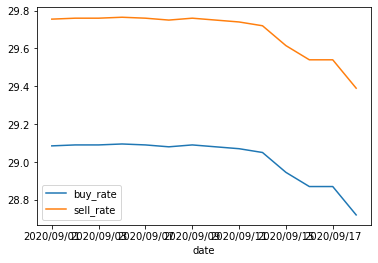

<Figure size 720x576 with 0 Axes>

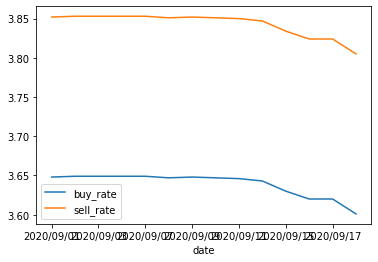

<Figure size 720x576 with 0 Axes>

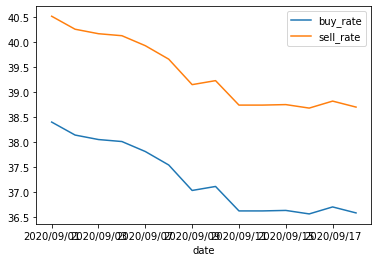

<Figure size 720x576 with 0 Axes>

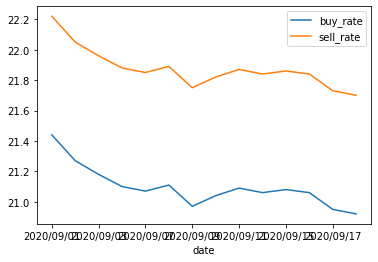

<Figure size 720x576 with 0 Axes>

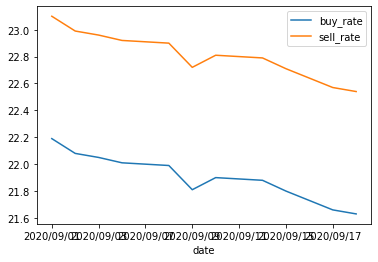

<Figure size 720x576 with 0 Axes>

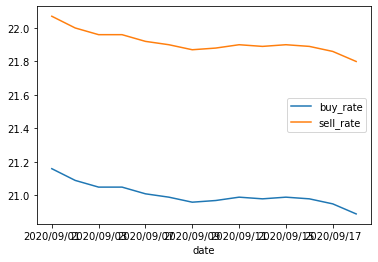

<Figure size 720x576 with 0 Axes>

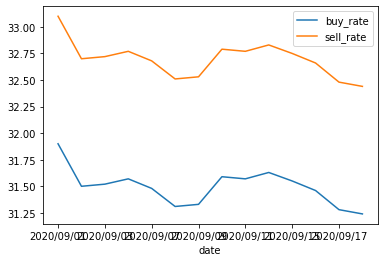

<Figure size 720x576 with 0 Axes>

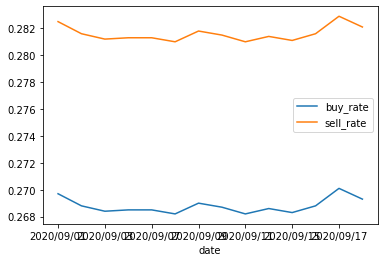

<Figure size 720x576 with 0 Axes>

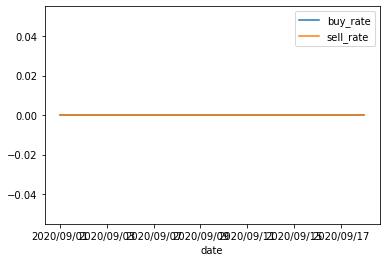

<Figure size 720x576 with 0 Axes>

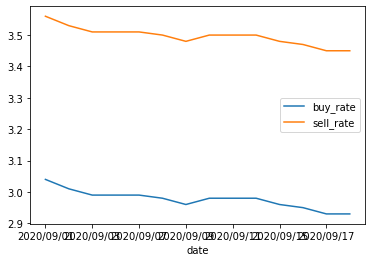

<Figure size 720x576 with 0 Axes>

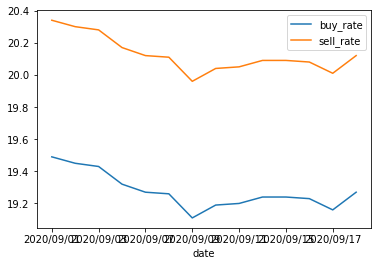

<Figure size 720x576 with 0 Axes>

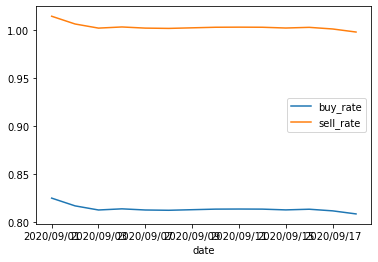

<Figure size 720x576 with 0 Axes>

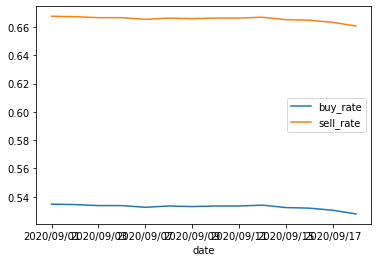

<Figure size 720x576 with 0 Axes>

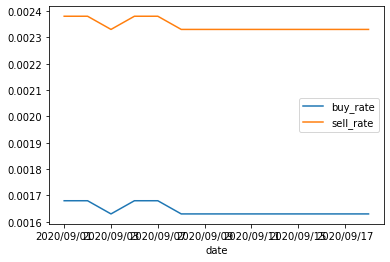

<Figure size 720x576 with 0 Axes>

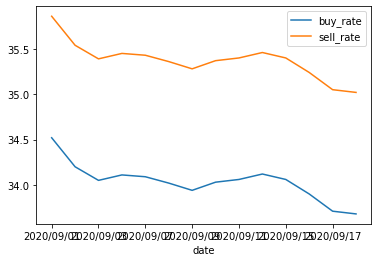

<Figure size 720x576 with 0 Axes>

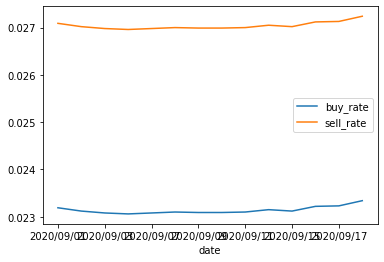

<Figure size 720x576 with 0 Axes>

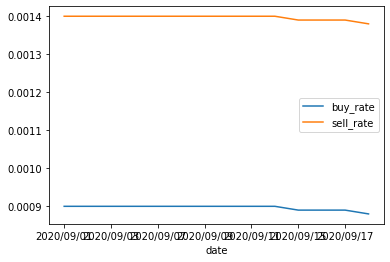

<Figure size 720x576 with 0 Axes>

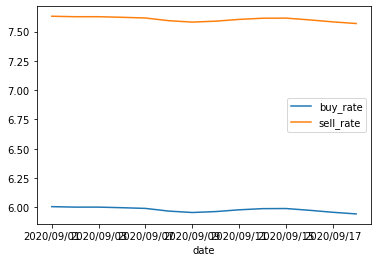

<Figure size 720x576 with 0 Axes>

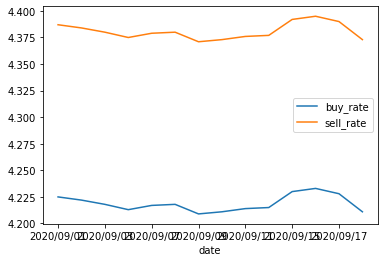

In [51]:
# 先到牌告匯率首頁，爬取所有貨幣的種類
url = 'https://rate.bot.com.tw/xrt?Lang=zh-TW'
ua = UserAgent()
header ={'user-agent': ua.random}
response = requests.get(url , headers = header)
soup = BeautifulSoup(response.text,'lxml')

money = soup.find('tbody')
for i in money.find_all('tr'):
    money_type = i.find('div',attrs={'class': 'visible-phone print_hide'})
    history_link = i.find('td',attrs={'data-table':'歷史匯率'})
    history_URL = 'https://rate.bot.com.tw'+history_link.a['href']
    print(money_type.text.strip())
    print(history_URL)
        
# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
    quote_history_url = history_URL.replace("history", "quote/2020-09")
    res = requests.get(quote_history_url , headers= header)
    soup = BeautifulSoup(res.text,'lxml')
    history_table = soup.find(name='tbody').find_all(name='tr')
    #print(history_table)
        
    date_history = list()
    history_buy = list()
    history_sell = list()
        
    for j in history_table:
        date_string = j.a.text
        date_history.append(date_string)
            
        history_rate = j.find_all('td',attrs={'class':'rate-content-cash text-right print_table-cell'})
        history_buy.append(float(history_rate[0].text))
        history_sell.append(float(history_rate[1].text))
    print(history_buy)
    print(history_sell)
        
    # 將匯率資料建成dataframe形式
    HistoryExchangeRate = pd.DataFrame({'date': date_history ,'buy_rate':history_buy,'sell_rate':history_sell})
    HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
    HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)
    print(HistoryExchangeRate)
        
    # 畫出歷史匯率軌跡圖
    plt.figure(figsize=(10, 8))
    HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 